# Automated testing

In [1]:
import classifier

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

2024-04-30 10:32:21.053584: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-30 10:32:22.826084: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-30 10:32:23.186145: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-04-30 10:32:23.186193: I tensorflow/compiler/xla/stream_executor/rocm/rocm_gpu_executor.cc:838] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA

1 Physical GPUs, 1 Logical GPUs


In [2]:
INPUT_WIDTH = 3
# start with a sequence length of 120
SEQ_LEN=180

# do 5 test runs
RUNS=1

## Load data

In [3]:
players_inputs = classifier.players_inputs('dataset/demo/displacements/')
num_players = len(players_inputs.keys())

## Testing Functions

In [4]:
def get_accs(hs, ys):
    
    ranks = []
    for i in range(hs.shape[0]):
        rankings = np.argsort(hs[i])
        rank = (num_players-1) - np.where((rankings == np.argmax(ys[i])))[0][0]
        ranks.append(rank)
    
    # top n accuracy
    topn_occurences = []
    running = 0
    for i in range(num_players):
        topn_occurences.append(ranks.count(i) + running)
        running += ranks.count(i)

    topn_acc = [t / topn_occurences[-1] for t in topn_occurences]

    return topn_acc

def get_confusion(hs, ys):
    # confusion matrix
    c_matrix = [[0 for i in range(num_players)] for j in range(num_players)]
    for i in range(len(hs)):
        actual = np.argmax(ys[i])
        predicted = np.argmax(hs[i])
        # y axis is predicted value, x axis is actual value
        c_matrix[predicted][actual] += 1

    return c_matrix

def test_model(model, test_x, test_y):    

    # test
    test_h = model.predict(test_x)

    topn_acc = get_accs(test_h, test_y)
    c_matrix = get_confusion(test_h, test_y)

    return topn_acc, c_matrix

## Test

In [5]:
def test_run(model):
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = classifier.prepare_data(players_inputs, seq_len=SEQ_LEN)

    print(f'{len(train_x)=}, {len(valid_x)=}, {len(test_x)=}')

    history = model.fit(
        train_x, train_y, epochs=80, verbose=0, batch_size=64, validation_data=(valid_x, valid_y)
    )

    # run the tests
    topn_acc, c_matrix = test_model(model, test_x, test_y)

    return history, topn_acc, c_matrix

In [6]:
model = classifier.createClassifier(width=3, seq_len=SEQ_LEN)
model.summary()

model.save_weights('models/untrained')

2024-04-30 10:32:25.012023: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.016658: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.087069: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.093283: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.096326: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.100558: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.103352: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.106066: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.107911: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 180, 3)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 87, 32)               704       ['input_1[0][0]']             
                                                                                                  
 conv1d_1 (Conv1D)           (None, 178, 32)              320       ['input_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 265, 32)              0         ['conv1d[0][0]',              
                                                                     'conv1d_1[0][0]']        

2024-04-30 10:32:25.380868: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.381517: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.382262: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.382729: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.386106: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.386707: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.387186: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.389572: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.390037: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25

In [7]:
histories = []
topns = []
c_matrices = []

for i in range(RUNS):
    # reset the model
    model.load_weights('models/untrained')

    # do a test run
    h, t, c = test_run(model)
    
    histories.append(h)
    topns.append(t)
    c_matrices.append(c)

2024-04-30 10:32:25.467036: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.470006: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


len(train_x)=7608, len(valid_x)=2536, len(test_x)=2536


2024-04-30 10:32:25.967631: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.969790: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.974109: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.974825: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.982241: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.983278: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.989020: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.990590: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25.995761: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:32:25

 5/80 [>.............................] - ETA: 1s 

2024-04-30 10:37:47.135488: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:37:47.167588: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:37:47.209460: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


80/80 [==============================] - 2s 14ms/step


2024-04-30 10:37:48.294902: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:37:48.296469: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:37:48.328845: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:37:48.339002: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:37:48.340652: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:37:48.343656: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.
2024-04-30 10:37:48.352569: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:508] ROCm Fusion is enabled.


# deal with the results

In [8]:
# t_hists = list(zip(*histories[::-1]))
t_accs = list(zip(*topns[::-1]))

### top n accuracies

In [9]:
avg_accs = []
for n in t_accs:
    avg_accs.append(sum(n) / len(n))

print(f'{t_accs}\n{avg_accs}')

[(0.9266561514195584,), (0.9802839116719243,), (0.9917192429022083,), (0.9964511041009464,), (0.9968454258675079,), (0.9980283911671924,), (0.999211356466877,), (0.9996056782334385,), (1.0,), (1.0,), (1.0,)]
[0.9266561514195584, 0.9802839116719243, 0.9917192429022083, 0.9964511041009464, 0.9968454258675079, 0.9980283911671924, 0.999211356466877, 0.9996056782334385, 1.0, 1.0, 1.0]


### confusion matrix

In [10]:
avg_cmatrix = np.mean(c_matrices, axis=0)

In [11]:
def normalize_cmatrix(c_matrix):
    p_matrix = np.array(c_matrix, copy=True, dtype=np.float64)
    real_occurences = np.sum(c_matrix, axis=0)
    print(real_occurences)

    for i in range(num_players):
        for j in range(num_players):
            p_matrix[i][j] /= real_occurences[j]
    
    return p_matrix

p_matrix = normalize_cmatrix(avg_cmatrix)

[251. 272. 234. 321. 242.  22.  47. 441. 215. 206. 285.]


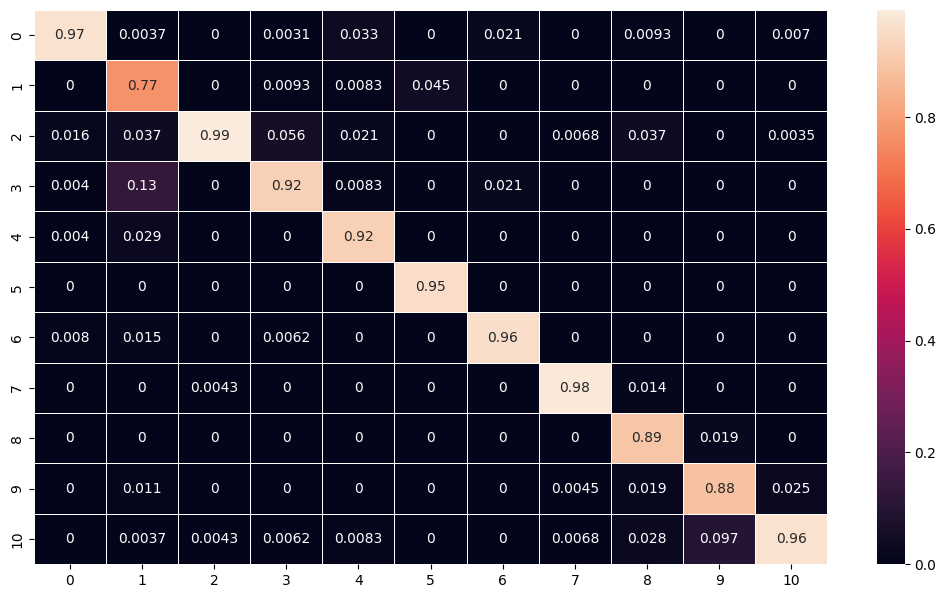

In [12]:
px = 1/plt.rcParams['figure.dpi']  # pixels per inch
plt.subplots(figsize=(1280*px, 720*px))

ax = sns.heatmap(p_matrix, linewidth=.6, annot=True)
# plt.savefig(f'results/GRU_matrix')
plt.show()

In [13]:
classifier.mapping()

{'2saint': 0,
 'aklo': 1,
 'amsa': 2,
 'axe': 3,
 'cody': 4,
 'cpu': 5,
 'cynthia': 6,
 'hbox': 7,
 'kodorin': 8,
 'logan': 9,
 'mang0': 10}

## learning curve

In [14]:
# average the histories

t_accs = np.array([[x for x in h.history['accuracy']] for h in histories])
mean_accs = np.mean(t_accs, axis=0)
v_accs = np.array([[x for x in h.history['val_accuracy']] for h in histories])
mean_val_accs = np.mean(v_accs, axis=0)
mean_val_accs.shape

avg_history = {'accuracy': histories[0].history['accuracy'], 'val_accuracy': histories[0].history['val_accuracy']}

In [15]:
len(histories)

1

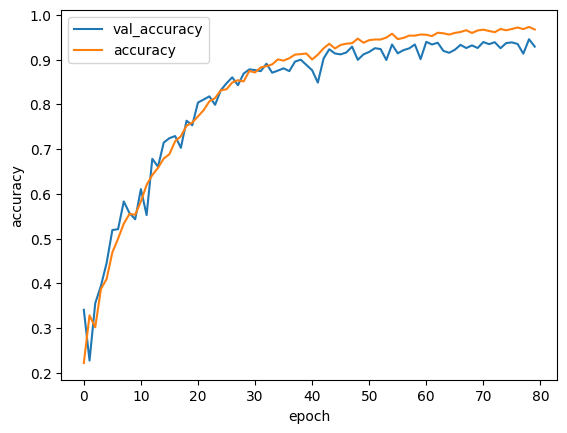

In [16]:
plt.plot('val_accuracy', data=avg_history)
plt.plot('accuracy', data=avg_history)
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend()

# plt.savefig(f'results/GRU_curve')
plt.show()